<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Battery-Project/data-preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### **데이터 불러오기 및 합치기**

In [ ]:
bat_process = pd.read_csv('/content/mydrive/MyDrive/posco-big-data/bat_process.csv', encoding = 'euc-kr')

print(bat_process.shape)
bat_process.head()

(43754, 109)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (97,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


In [ ]:
bat_tat = pd.read_csv('/content/mydrive/MyDrive/posco-big-data/bat_tat.csv', encoding = 'euc-kr')

print(bat_tat.shape)
bat_tat.head()

(43754, 25)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,...,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,...,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532


In [10]:
bat_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Columns: 109 entries, lot_id to m1_voltage_an
dtypes: float64(1), int64(54), object(54)
memory usage: 36.4+ MB


In [ ]:
bat_tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lot_id     43754 non-null  object
 1   tray_id    43754 non-null  object
 2   dt_start   43754 non-null  object
 3   cell_id    43754 non-null  object
 4   rta1_tat   43754 non-null  int64 
 5   hta1_tat   43754 non-null  int64 
 6   rta2_tat   43754 non-null  int64 
 7   ocv1_tat   43754 non-null  int64 
 8   c1_tat     43754 non-null  int64 
 9   dc1_tat    43754 non-null  int64 
 10  c2_tat     43754 non-null  int64 
 11  dc2_tat    43754 non-null  int64 
 12  c3_tat     43754 non-null  int64 
 13  dc3_tat    43754 non-null  int64 
 14  c4_tat     43754 non-null  int64 
 15  ocv2_tat   43754 non-null  int64 
 16  pg1_tat    43754 non-null  int64 
 17  pc1_tat    43754 non-null  int64 
 18  sa1_tat    43754 non-null  int64 
 19  socv1_tat  43754 non-null  int64 
 20  sa2_tat    43754 non-null  o

In [ ]:
df_raw = pd.merge(bat_tat, bat_process)

print(df_raw.shape)
df_raw.head()

(43754, 130)


,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


### **결측치 확인하기**

In [ ]:
df_raw.isnull().sum()

lot_id           0
tray_id          0
dt_start         0
cell_id          0
rta1_tat         0
                ..
m1_thick         0
m1_voltage       0
m1_res_ac        0
m1_mv            0
m1_voltage_an    0
Length: 130, dtype: int64

In [42]:
## 결측치('.', ' ')를 포함한 데이터프레임 추출하기

indices = []

def missing_values(data) :

    for col in data.columns :
        dat = data.loc[(data[col] == '.') | (data[col] == ' '), :]
        idx = dat.index
        indices.append(index)
    return list(set(index))


df_raw.iloc[missing_values(df_raw), :]

,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
10756,LOT-108,TRAY-1429,12-05-2021 오전 4:24:45,CELL-18729,208973,87721,92174,118,3567,404,...,NaN,NaN,.,.,.,.,.,.,.,.
10757,LOT-108,TRAY-1429,12-05-2021 오전 4:24:45,CELL-18730,208973,87721,92174,118,3567,404,...,NaN,NaN,.,.,.,.,.,.,.,.
20485,LOT-123,TRAY-1845,12-09-2021 오전 1:00:10,CELL-33111,200023,86611,117836,118,3572,405,...,06연,10단,3758.8,5,6.9,.,.,.,.,.
10759,LOT-108,TRAY-1429,12-05-2021 오전 4:24:45,CELL-18732,208973,87721,92174,118,3567,404,...,NaN,NaN,.,.,.,.,.,.,.,.
10762,LOT-108,TRAY-1429,12-05-2021 오전 4:24:45,CELL-18735,208973,87721,92174,118,3567,404,...,NaN,NaN,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34791,LOT-135,TRAY-2415,12-14-2021 오전 6:51:40,CELL-45192,163195,91629,141342,119,3553,404,...,34연,08단,3759.3,5.0,7.0,.,.,.,.,.
39916,LOT-140,TRAY-2621,12-16-2021 오전 4:26:50,CELL-50160,156507,89348,143280,118,3566,404,...,64연,04단,3759.5,3.9,5.8,.,.,.,.,.
20980,LOT-121,TRAY-1852,12-09-2021 오전 2:23:00,CELL-31144,199341,86445,117800,118,3566,404,...,49연,07단,3759.5,5.3,7.3,.,.,.,.,.
19957,LOT-122,TRAY-1811,12-08-2021 오후 5:26:50,CELL-31735,200614,86521,117492,119,3571,404,...,07연,01단,3760,5.1,7.1,.,.,.,.,.


In [36]:
df_raw.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'rta1_tat', 'hta1_tat',
       'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat',
       ...
       'sa3_box_row', 'sa3_box_dan', 'socv3_ocv', 'ocv2_deltaocv',
       'ocv1_deltaocv', 'm1_thick', 'm1_voltage', 'm1_res_ac', 'm1_mv',
       'm1_voltage_an'],
      dtype='object', length=130)

In [37]:
df_raw['m1_voltage_an']

0        164
1         73
2        -57
3         99
4         36
        ... 
43749    -35
43750     89
43751    -23
43752      3
43753     56
Name: m1_voltage_an, Length: 43754, dtype: object

In [40]:
for col in df_raw.columns :
    print('*** 변수명 : ', col, ' ***')
    print('')
    print(df_raw[col].value_counts())
    print('')

*** 변수명 :  lot_id  ***

LOT-135    999
LOT-132    998
LOT-134    998
LOT-143    997
LOT-142    997
LOT-133    997
LOT-129    996
LOT-101    995
LOT-100    994
LOT-102    993
LOT-141    993
LOT-113    993
LOT-104    991
LOT-107    990
LOT-138    989
LOT-140    989
LOT-128    989
LOT-137    988
LOT-124    988
LOT-106    988
LOT-139    987
LOT-122    987
LOT-119    986
LOT-109    986
LOT-121    985
LOT-111    985
LOT-112    979
LOT-116    977
LOT-136    977
LOT-110    974
LOT-117    972
LOT-114    970
LOT-108    967
LOT-105    966
LOT-118    965
LOT-127    965
LOT-103    964
LOT-144    961
LOT-120    941
LOT-123    936
LOT-126    916
LOT-130    908
LOT-131    898
LOT-115    897
LOT-125    843
Name: lot_id, dtype: int64

*** 변수명 :  tray_id  ***

TRAY-1901    25
TRAY-2216    25
TRAY-2174    25
TRAY-2173    25
TRAY-2172    25
             ..
TRAY-1304    22
TRAY-1760    22
TRAY-1613    22
TRAY-2059    22
TRAY-1758    22
Name: tray_id, Length: 1766, dtype: int64

*** 변수명 :  dt_start  ***

12-

### **12-14번 공정 확인하기**

In [ ]:
df_raw.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'rta1_tat', 'hta1_tat',
       'rta2_tat', 'ocv1_tat', 'c1_tat', 'dc1_tat',
       ...
       'sa3_box_row', 'sa3_box_dan', 'socv3_ocv', 'ocv2_deltaocv',
       'ocv1_deltaocv', 'm1_thick', 'm1_voltage', 'm1_res_ac', 'm1_mv',
       'm1_voltage_an'],
      dtype='object', length=130)

In [ ]:
a = df_raw.loc[:, ['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge']]
b = df_raw.loc[:, ['lot_id', 'tray_id', 'dt_start', 'cell_id',
                   'ocv2_tat', 'pg1_tat', 'pc1_tat',
                   'ocv2_ocv', 'ocv2_box_col', 'ocv2_box_dan', 
                   'pg1_impfit', 'pg1_imp', 'pg1_voltage_start', 'pg1_curr_end', 'pg1_box_col', 'pg1_box_dan', 'pg1_temp_avg', 
                   'pc1_imp', 'pc1_voltage_start', 'pc1_curr_end', 'pc1_box_col', 'pc1_box_dan']]

In [ ]:
df_raw_1214 = pd.merge(a,b)

print(df_raw_1214.shape)
df_raw_1214.head()

(43754, 23)


,lot_id,tray_id,dt_start,cell_id,judge,ocv2_tat,pg1_tat,pc1_tat,ocv2_ocv,ocv2_box_col,...,pg1_voltage_start,pg1_curr_end,pg1_box_col,pg1_box_dan,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end,pc1_box_col,pc1_box_dan
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,118,290,290,3764,22열,...,3759,120,12열,01단,288,2086,3714,150,12열,01단
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,118,290,290,3763,22열,...,3758,120,12열,01단,288,2093,3714,150,12열,01단
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,118,290,290,3764,22열,...,3759,120,12열,01단,288,2081,3715,150,12열,01단
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,118,290,290,3764,22열,...,3759,119,12열,01단,288,2083,3714,150,12열,01단
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,118,290,290,3762,22열,...,3758,120,12열,01단,288,2083,3714,150,12열,01단


In [ ]:
df_raw_1214.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'ocv2_tat',
       'pg1_tat', 'pc1_tat', 'ocv2_ocv', 'ocv2_box_col', 'ocv2_box_dan',
       'pg1_impfit', 'pg1_imp', 'pg1_voltage_start', 'pg1_curr_end',
       'pg1_box_col', 'pg1_box_dan', 'pg1_temp_avg', 'pc1_imp',
       'pc1_voltage_start', 'pc1_curr_end', 'pc1_box_col', 'pc1_box_dan'],
      dtype='object')

In [ ]:
df_raw_1214.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43754 entries, 0 to 43753
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lot_id             43754 non-null  object
 1   tray_id            43754 non-null  object
 2   dt_start           43754 non-null  object
 3   cell_id            43754 non-null  object
 4   judge              43754 non-null  object
 5   ocv2_tat           43754 non-null  int64 
 6   pg1_tat            43754 non-null  int64 
 7   pc1_tat            43754 non-null  int64 
 8   ocv2_ocv           43754 non-null  int64 
 9   ocv2_box_col       43754 non-null  object
 10  ocv2_box_dan       43754 non-null  object
 11  pg1_impfit         43754 non-null  int64 
 12  pg1_imp            43754 non-null  int64 
 13  pg1_voltage_start  43754 non-null  int64 
 14  pg1_curr_end       43754 non-null  int64 
 15  pg1_box_col        43754 non-null  object
 16  pg1_box_dan        43754 non-null  objec

**연속형 변수와 범주형 변수 분리하기**

In [ ]:
df_raw_1214_num = df_raw_1214.drop(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge',
                                    'ocv2_box_col', 'ocv2_box_dan', 'pg1_box_col', 'pg1_box_dan', 'pc1_box_col', 'pc1_box_dan'], 
                                    axis = 1, inplace = False)

df_raw_1214_cat = df_raw_1214[['ocv2_box_col', 'ocv2_box_dan', 'pg1_box_col', 'pg1_box_dan', 'pc1_box_col', 'pc1_box_dan']]

In [ ]:
print(df_raw_1214_num.shape)
df_raw_1214_num.head()

(43754, 12)


,ocv2_tat,pg1_tat,pc1_tat,ocv2_ocv,pg1_impfit,pg1_imp,pg1_voltage_start,pg1_curr_end,pg1_temp_avg,pc1_imp,pc1_voltage_start,pc1_curr_end
0,118,290,290,3764,2211,2114,3759,120,288,2086,3714,150
1,118,290,290,3763,2224,2127,3758,120,288,2093,3714,150
2,118,290,290,3764,2217,2120,3759,120,288,2081,3715,150
3,118,290,290,3764,2214,2117,3759,119,288,2083,3714,150
4,118,290,290,3762,2221,2124,3758,120,288,2083,3714,150


In [ ]:
df_raw_1214_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43754 entries, 0 to 43753
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ocv2_tat           43754 non-null  int64
 1   pg1_tat            43754 non-null  int64
 2   pc1_tat            43754 non-null  int64
 3   ocv2_ocv           43754 non-null  int64
 4   pg1_impfit         43754 non-null  int64
 5   pg1_imp            43754 non-null  int64
 6   pg1_voltage_start  43754 non-null  int64
 7   pg1_curr_end       43754 non-null  int64
 8   pg1_temp_avg       43754 non-null  int64
 9   pc1_imp            43754 non-null  int64
 10  pc1_voltage_start  43754 non-null  int64
 11  pc1_curr_end       43754 non-null  int64
dtypes: int64(12)
memory usage: 4.3 MB


In [ ]:
print(df_raw_1214_cat.shape)
df_raw_1214_cat.head()

(43754, 6)


,ocv2_box_col,ocv2_box_dan,pg1_box_col,pg1_box_dan,pc1_box_col,pc1_box_dan
0,22열,08단,12열,01단,12열,01단
1,22열,08단,12열,01단,12열,01단
2,22열,08단,12열,01단,12열,01단
3,22열,08단,12열,01단,12열,01단
4,22열,08단,12열,01단,12열,01단


### **연속형 범수 분포 확인하기**

In [ ]:
df_raw_1214_num.columns

Index(['ocv2_tat', 'pg1_tat', 'pc1_tat', 'ocv2_ocv', 'pg1_impfit', 'pg1_imp',
       'pg1_voltage_start', 'pg1_curr_end', 'pg1_temp_avg', 'pc1_imp',
       'pc1_voltage_start', 'pc1_curr_end'],
      dtype='object')

In [ ]:
df_bad = df_raw_1214.loc[df_raw_1214['judge'] == '불량', :]
df_good = df_raw_1214.loc[df_raw_1214['judge'] == '양품', :]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)


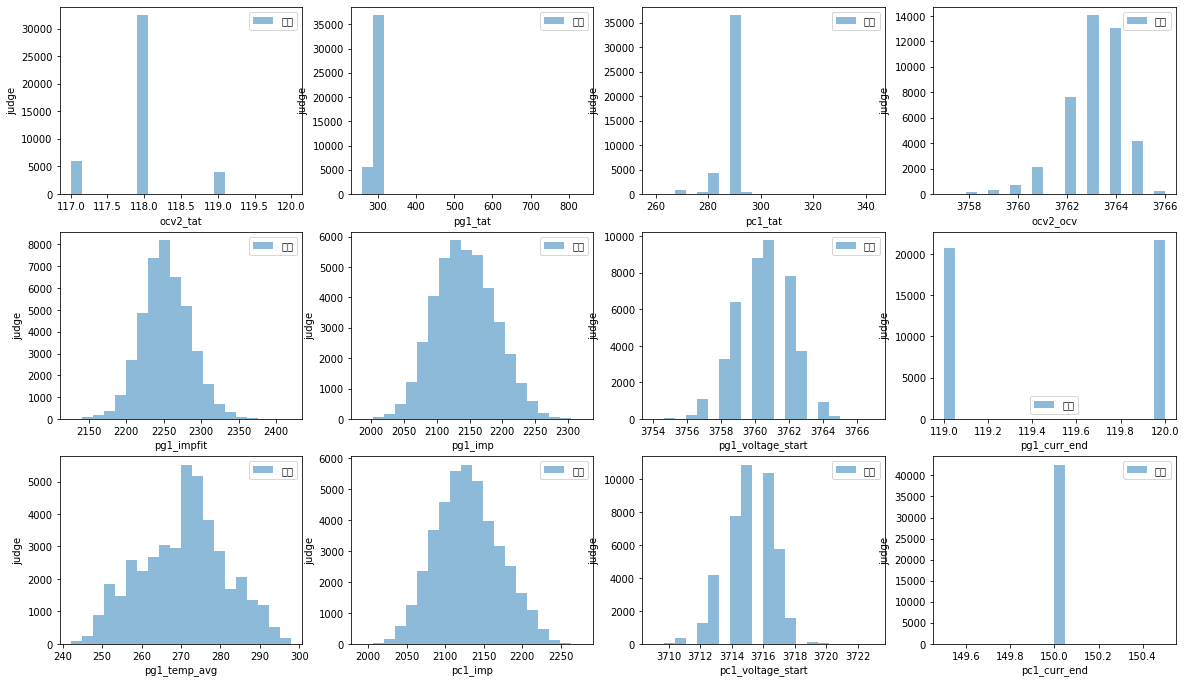

In [ ]:
# 양품의 히스토그램 시각화

i = 0
plt.figure(figsize = (20, 20))

for col in df_raw_1214_num.columns :
  i += 1
  plt.subplot(5, 4, i)
  plt.hist(df_good[df_good["judge"] == "양품"][col], bins = 20, label = "양품", alpha = 0.5)
#   plt.hist(df_bad[df_bad["judge"] == "불량"][col], bins = 20, label = "불량", alpha = 0.5)
  plt.xlabel(col)
  plt.ylabel("judge")
  plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)


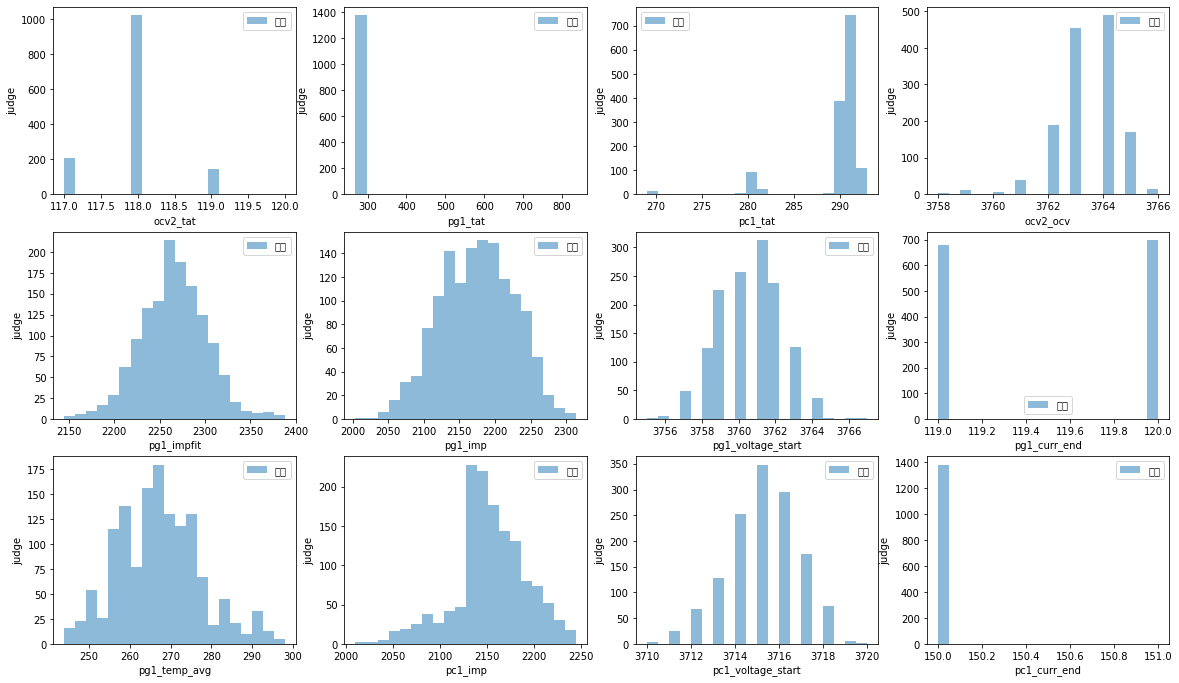

In [ ]:
# 불량의 히스토그램 시각화

i = 0
plt.figure(figsize = (20, 20))

for col in df_raw_1214_num.columns :
  i += 1
  plt.subplot(5, 4, i)
#   plt.hist(df_good[df_good["judge"] == "양품"][col], bins = 20, label = "양품", alpha = 0.5)
  plt.hist(df_bad[df_bad["judge"] == "불량"][col], bins = 20, label = "불량", alpha = 0.5)
  plt.xlabel(col)
  plt.ylabel("judge")
  plt.legend()
plt.show()

### **범주형 변수 분포 확인하기**

In [ ]:
df_raw_1214_cat.columns

Index(['ocv2_box_col', 'ocv2_box_dan', 'pg1_box_col', 'pg1_box_dan',
       'pc1_box_col', 'pc1_box_dan'],
      dtype='object')

In [ ]:
# 범주형 변수
# 교차표

for col in df_raw_1214_cat.columns:
  print("***", col, "***")
  print(pd.crosstab(index = df_raw_1214["judge"], columns = df_raw_1214_cat[col]))
  print()
  print(pd.crosstab(index = df_raw_1214["judge"], columns = df_raw_1214_cat[col], normalize = "columns").round(3))
  print()

*** ocv2_box_col ***
ocv2_box_col   01열   02열   03열   04열   05열   06열   07열   08열   09열   10열  ...  \
judge                                                                     ...   
불량              55    71    67    20    42    15    76    53    19    25  ...   
양품            1829  2028  1638  1179  1528  1804  2040  1970  1848  1890  ...   

ocv2_box_col   13열   14열   15열   16열   17열   18열   19열   20열   21열   22열  
judge                                                                     
불량              24    88    25    77    27    17    48    65   136   296  
양품            2097  2009  1684  1892  1946  1915  2221  2202  1910  2659  

[2 rows x 22 columns]

ocv2_box_col    01열    02열    03열    04열    05열    06열    07열    08열   09열  \
judge                                                                        
불량            0.029  0.034  0.039  0.017  0.027  0.008  0.036  0.026  0.01   
양품            0.971  0.966  0.961  0.983  0.973  0.992  0.964  0.974  0.99   

ocv2_box_col    1

### **이상치 확인하기**

In [ ]:
df_raw_1214_num.columns

Index(['ocv2_tat', 'pg1_tat', 'pc1_tat', 'ocv2_ocv', 'pg1_impfit', 'pg1_imp',
       'pg1_voltage_start', 'pg1_curr_end', 'pg1_temp_avg', 'pc1_imp',
       'pc1_voltage_start', 'pc1_curr_end'],
      dtype='object')

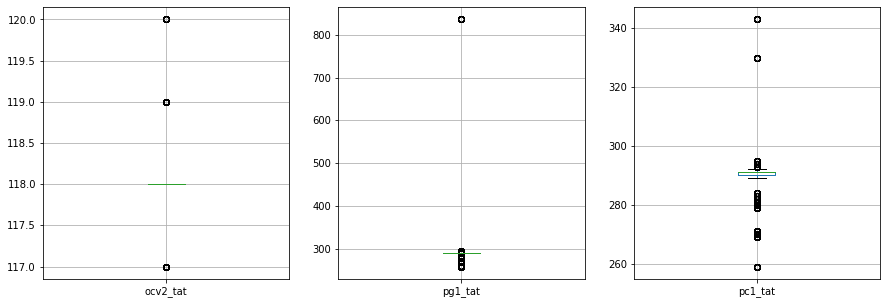

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))


ax1 = df_raw_1214_num.boxplot(column = 'ocv2_tat', ax = axes[0])
ax2 = df_raw_1214_num.boxplot(column = 'pg1_tat', ax = axes[1])
ax3 = df_raw_1214_num.boxplot(column = 'pc1_tat', ax = axes[2])
# ax3.set_title('pc1_tat')

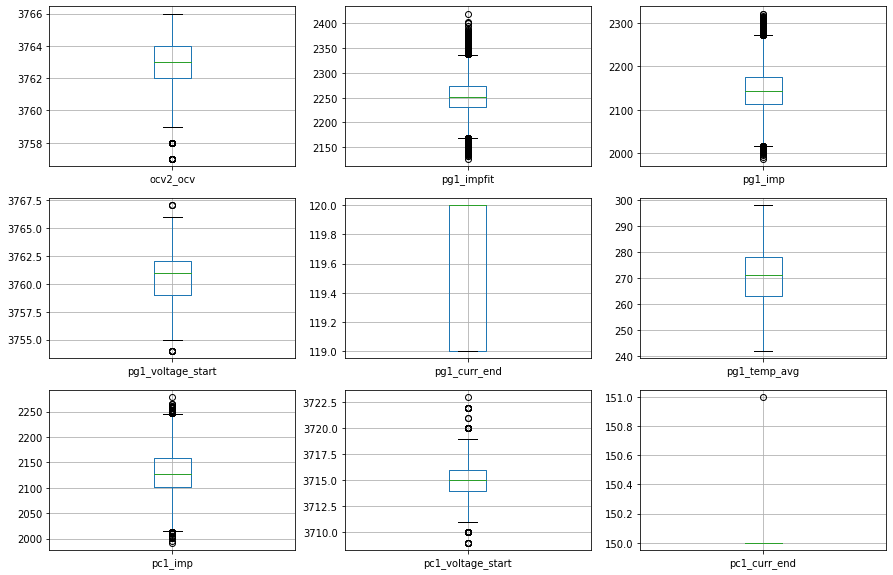

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15,10))


ax1 = df_raw_1214_num.boxplot(column = 'ocv2_ocv', ax = axes[0,0])
ax2 = df_raw_1214_num.boxplot(column = 'pg1_impfit', ax = axes[0,1])
ax3 = df_raw_1214_num.boxplot(column = 'pg1_imp', ax = axes[0,2])


ax4 = df_raw_1214_num.boxplot(column = 'pg1_voltage_start', ax = axes[1,0])
ax5 = df_raw_1214_num.boxplot(column = 'pg1_curr_end', ax = axes[1,1])
ax6 = df_raw_1214_num.boxplot(column = 'pg1_temp_avg', ax = axes[1,2])

ax7 = df_raw_1214_num.boxplot(column = 'pc1_imp', ax = axes[2,0])
ax8 = df_raw_1214_num.boxplot(column = 'pc1_voltage_start', ax = axes[2,1])
ax9 = df_raw_1214_num.boxplot(column = 'pc1_curr_end', ax = axes[2,2])